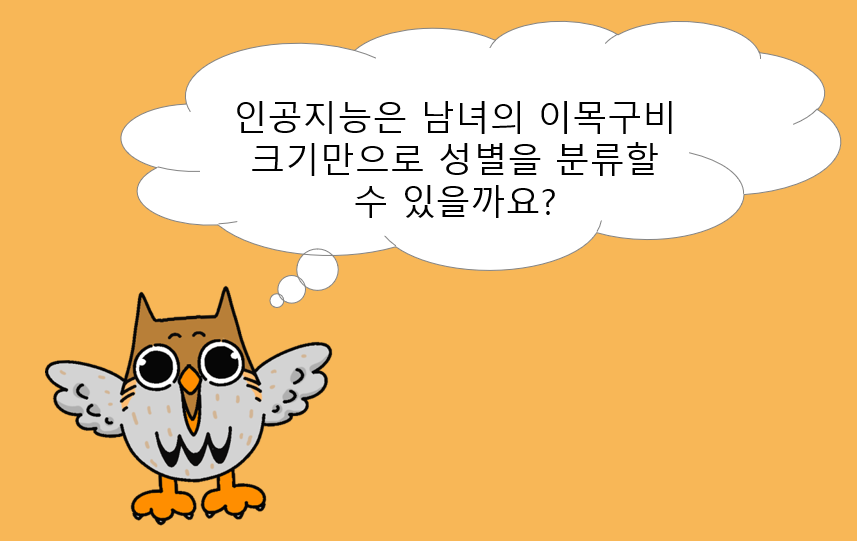

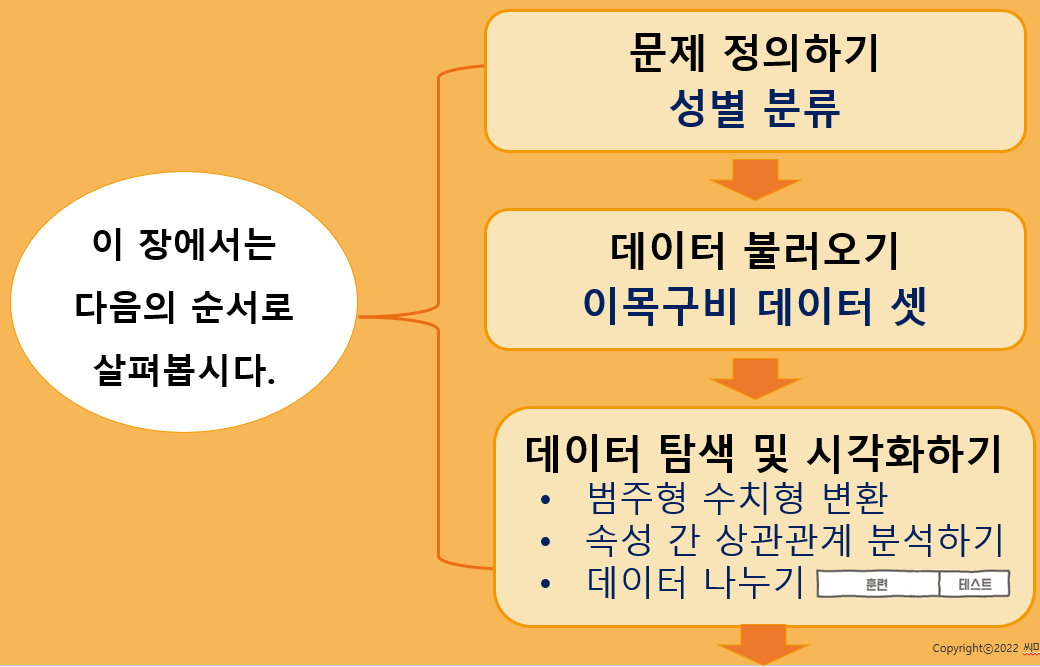

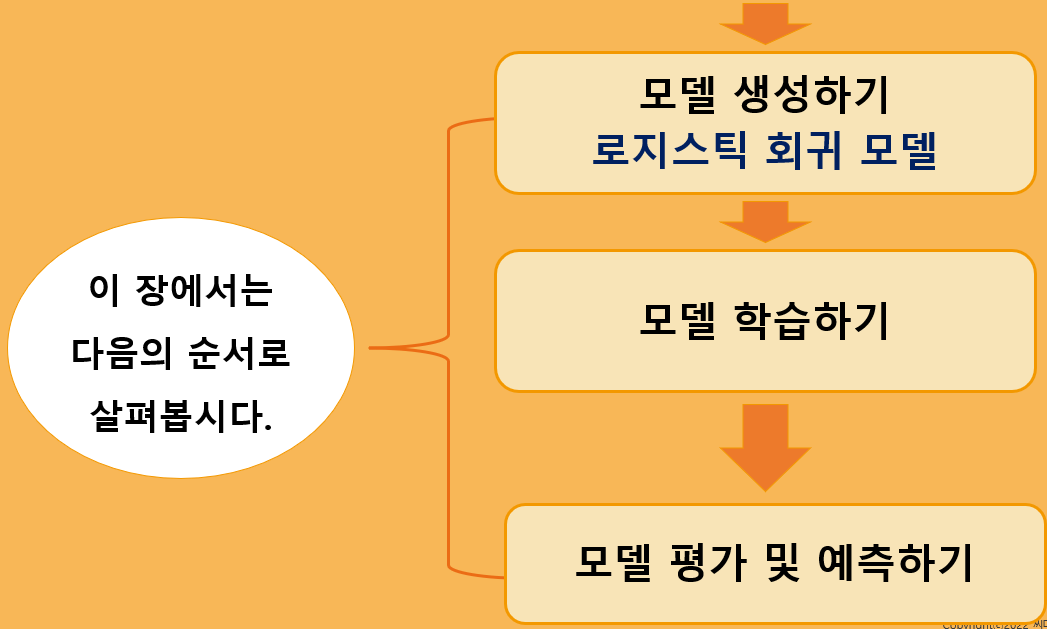

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# 2. 데이터 불러오기

In [2]:
df = pd.read_csv('/content/gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


# 3. 데이터 탐색 및 전처리

In [3]:
# 데이터 정보 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


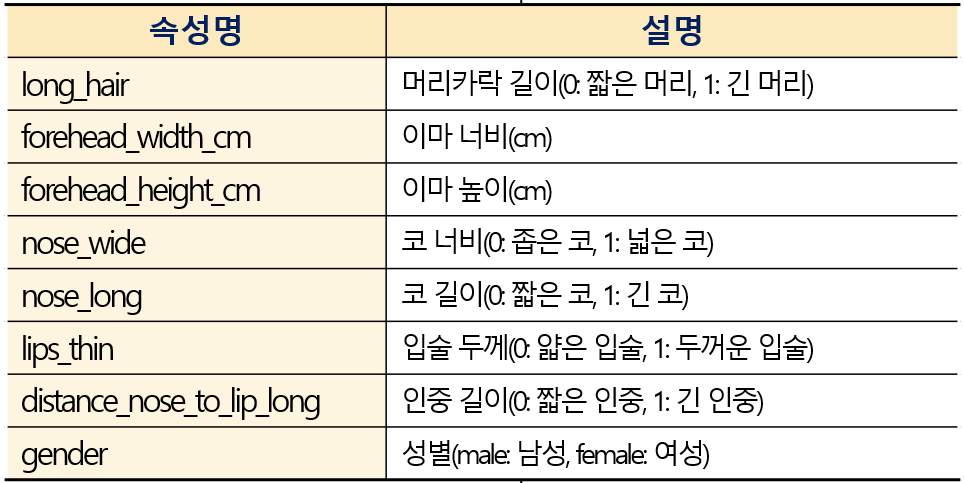

In [4]:
# 상위 5개 데이터 살펴보기
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
# 데이터 통계치 살펴보기
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


Female    2501
Male      2500
Name: gender, dtype: int64


<Axes: >

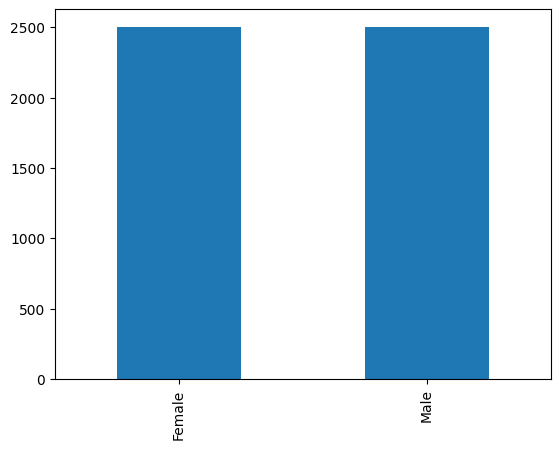

In [5]:
# 데이터 시각화1: 성별 인원 수 비교하기
print(df['gender'].value_counts())
df['gender'].value_counts().plot.bar( )

* 데이터 시각화2
* 머리카락 길이가 성별에 영향을 미칠까?

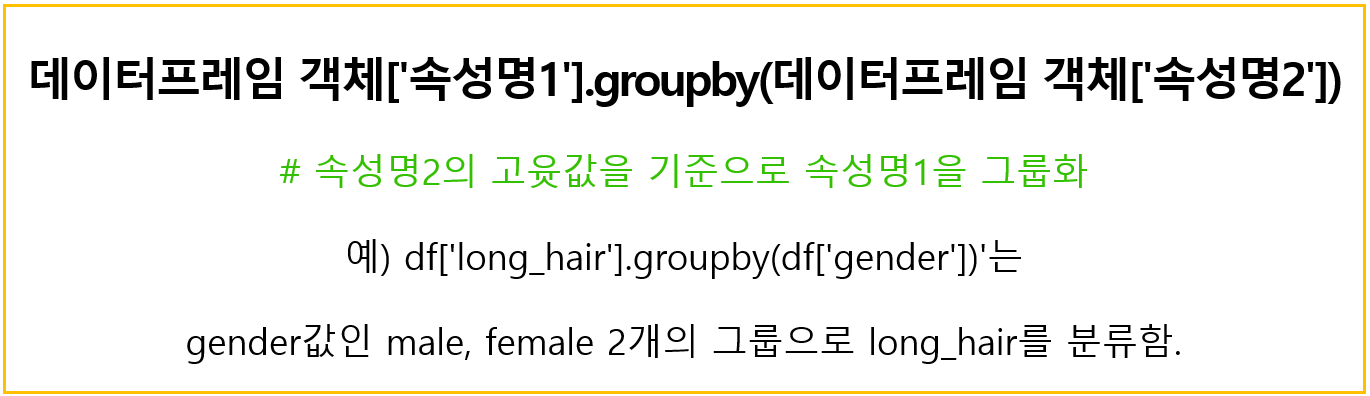

In [6]:
long_hair_count = df['long_hair'].groupby(df['gender']).mean( ).round(2)  # 평균을 소수점 둘째자리까지
long_hair_count

gender
Female    0.87
Male      0.87
Name: long_hair, dtype: float64

=> 머리카락 평균 길이가 동일하므로 이것으로는 분류가 어려움

In [7]:
nose_wide = df['nose_wide'].groupby(df['gender']).mean( ).round(2)  # 평균을 소수점 둘째자리까지
nose_wide

gender
Female    0.11
Male      0.87
Name: nose_wide, dtype: float64

In [8]:
nose_long = df['nose_long'].groupby(df['gender']).mean( ).round(2)  # 평균을 소수점 둘째자리까지
nose_long

gender
Female    0.14
Male      0.88
Name: nose_long, dtype: float64

In [9]:
lips_thin = df['lips_thin'].groupby(df['gender']).mean( ).round(2)  # 평균을 소수점 둘째자리까지
lips_thin

gender
Female    0.12
Male      0.86
Name: lips_thin, dtype: float64

In [10]:
distance_nose_to_lip_long = df['distance_nose_to_lip_long'].groupby(df['gender']).mean( ).round(2)  # 평균을 소수점 둘째자리까지
distance_nose_to_lip_long

gender
Female    0.12
Male      0.88
Name: distance_nose_to_lip_long, dtype: float64

[ 상관관계 분석 ]

두 속성 간에 관련성을 직선으로 표현하고 이 직선에 얼마나 밀집되어 있는가를 설명하는 분석 방법

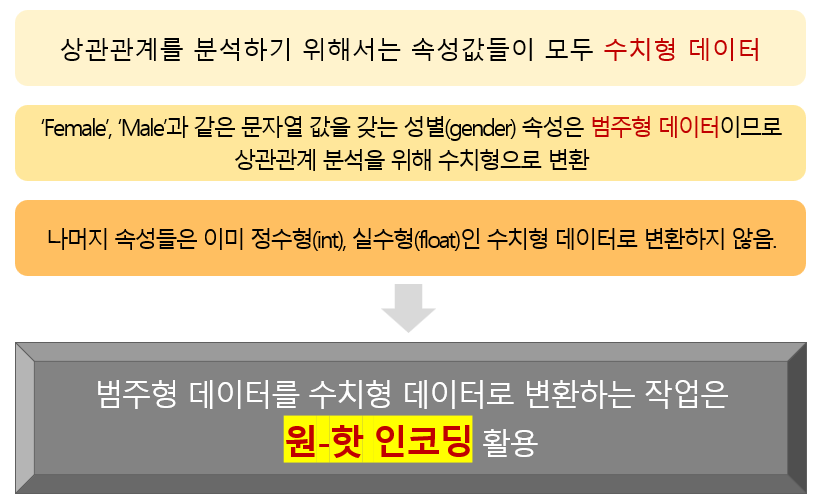

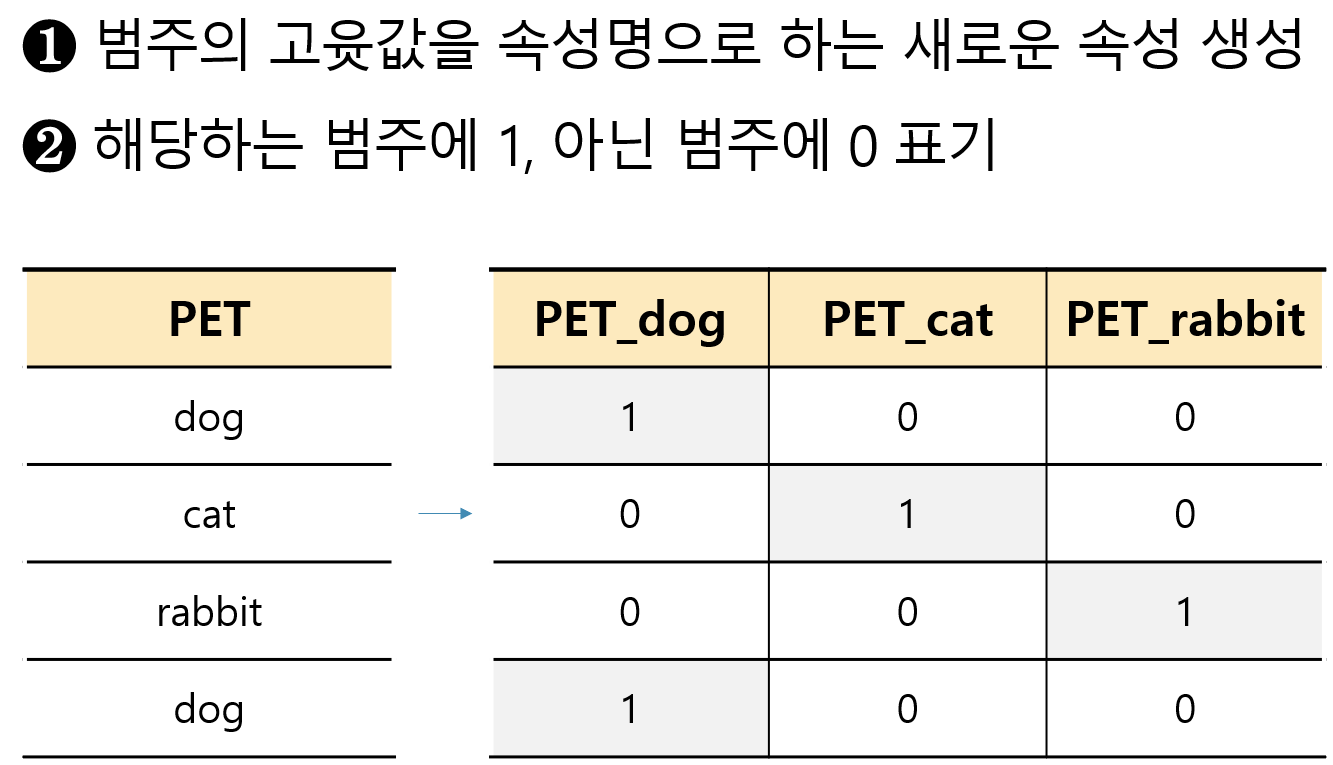

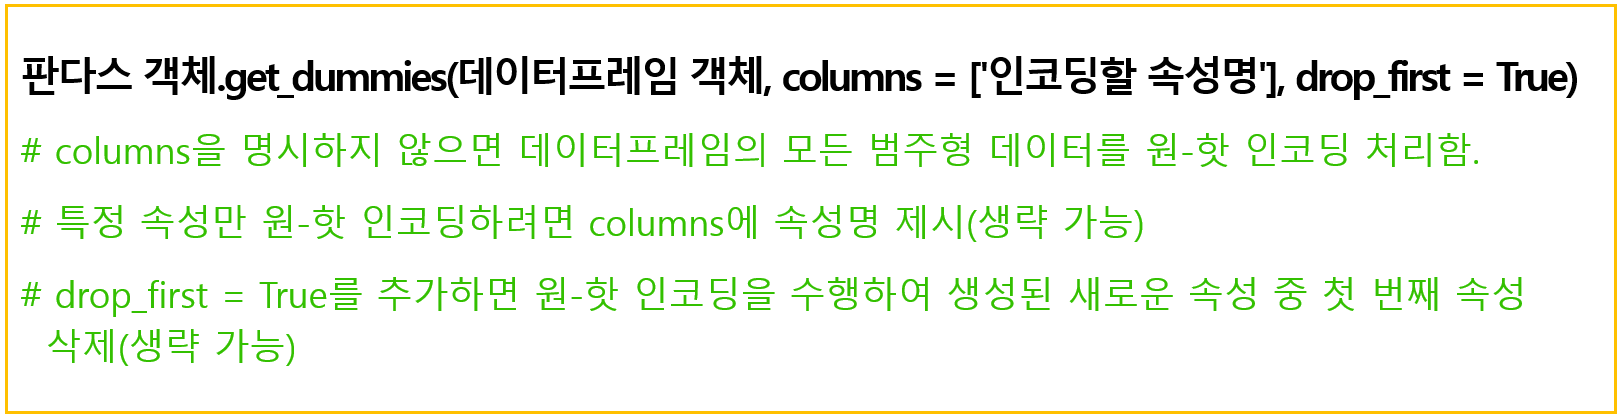

In [11]:
df_onehot = pd.get_dummies(df, columns = ['gender'])
df_onehot

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Female,gender_Male
0,1,11.8,6.1,1,0,1,1,0,1
1,0,14.0,5.4,0,0,1,0,1,0
2,0,11.8,6.3,1,1,1,1,0,1
3,0,14.4,6.1,0,1,1,1,0,1
4,1,13.5,5.9,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,1,0
4997,1,11.9,5.4,0,0,0,0,1,0
4998,1,12.9,5.7,0,0,0,0,1,0
4999,1,13.2,6.2,0,0,0,0,1,0


In [12]:
# 원-핫 인코딩하기(범주형 데이터인 속성 'gender'를 수치형 데이터로 변환)
df_onehot = pd.get_dummies(df, columns = ['gender'], drop_first = True)
df_onehot

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Male
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [13]:
# 데이터 속성 간 상관관계 분석하기
corr = df_onehot.corr( ).round(2)
corr

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Male
long_hair,1.00,-0.01,-0.02,0.00,0.01,0.01,-0.03,-0.01
forehead_width_cm,-0.01,1.00,0.09,0.25,0.26,0.26,0.25,0.33
forehead_height_cm,-0.02,0.09,1.00,0.21,0.19,0.21,0.22,0.28
nose_wide,0.00,0.25,0.21,1.00,0.57,0.56,0.57,0.76
nose_long,0.01,0.26,0.19,0.57,1.00,0.56,0.56,0.74
lips_thin,0.01,0.26,0.21,0.56,0.56,1.00,0.57,0.74
distance_nose_to_lip_long,-0.03,0.25,0.22,0.57,0.56,0.57,1.00,0.75
gender_Male,-0.01,0.33,0.28,0.76,0.74,0.74,0.75,1.00


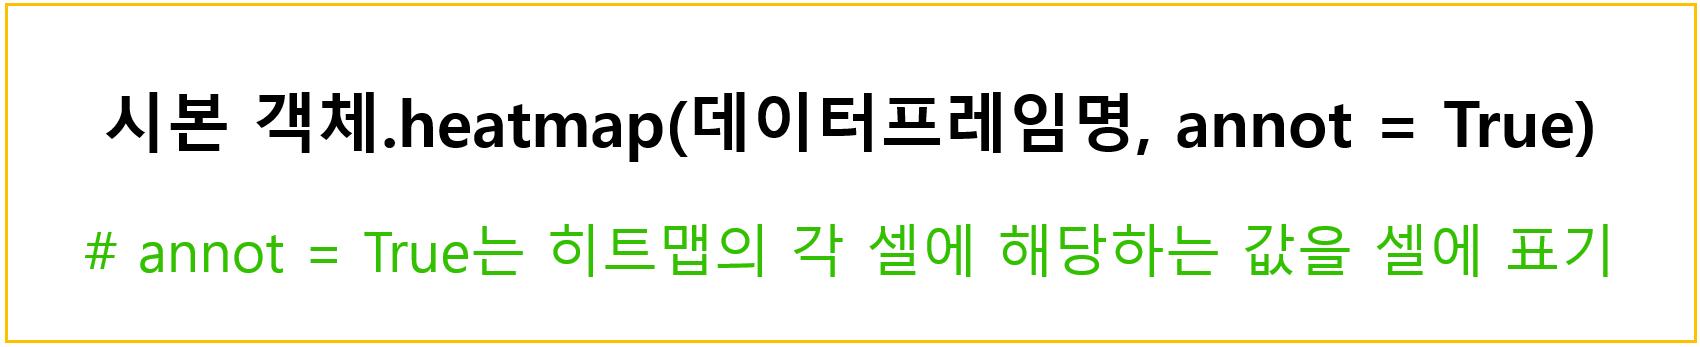

<Axes: >

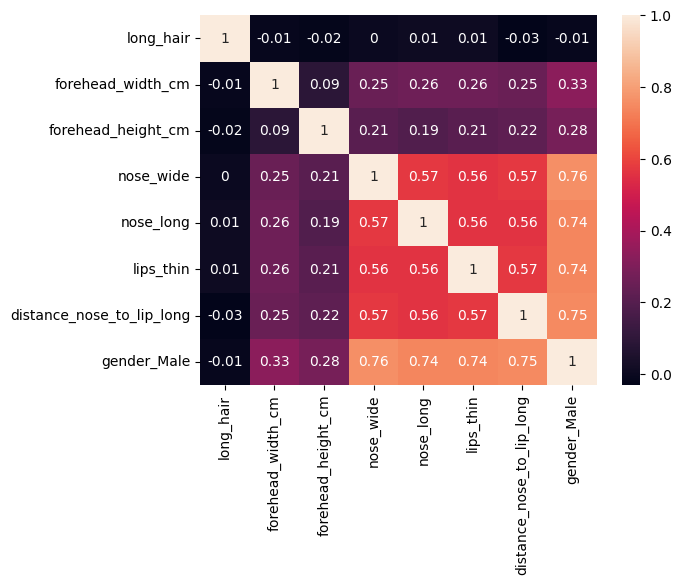

In [14]:
# 상관관계 히트맵 그리기
sns.heatmap(corr, annot = True)

In [15]:
# 독립 변수와 종속 변수 설정하기
x = df_onehot[['forehead_width_cm', 'forehead_height_cm', 'nose_wide',
              'nose_long', 'lips_thin', 'distance_nose_to_lip_long']] # 독립 변수
y = df_onehot['gender_Male'] # 종속 변수

In [16]:
# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

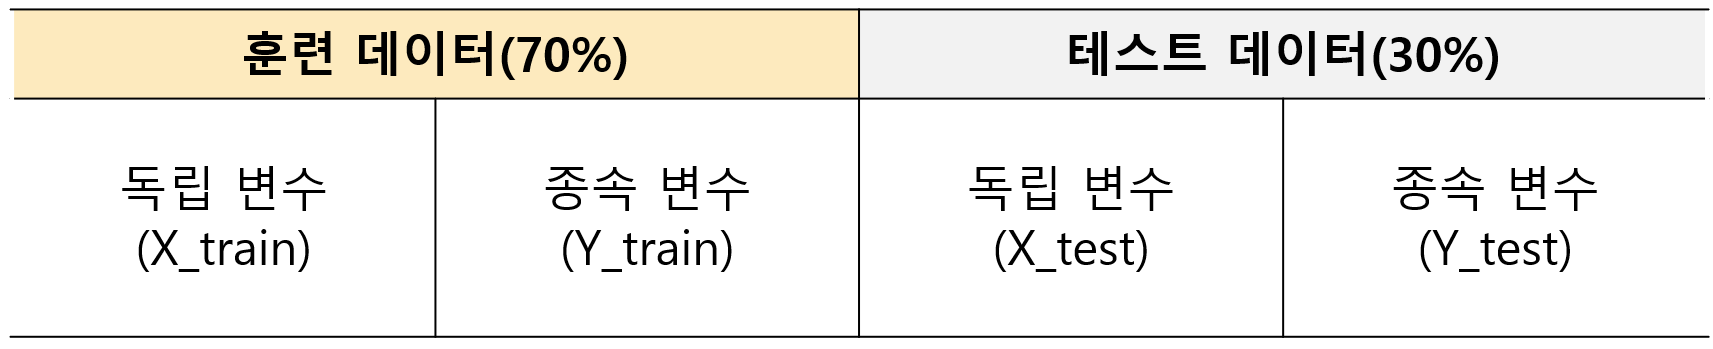

# 4. 모델 생성하기

In [17]:
# 모델 생성하기
LR_model = LogisticRegression( ) # 로지스틱 회귀 분류 모델 생성

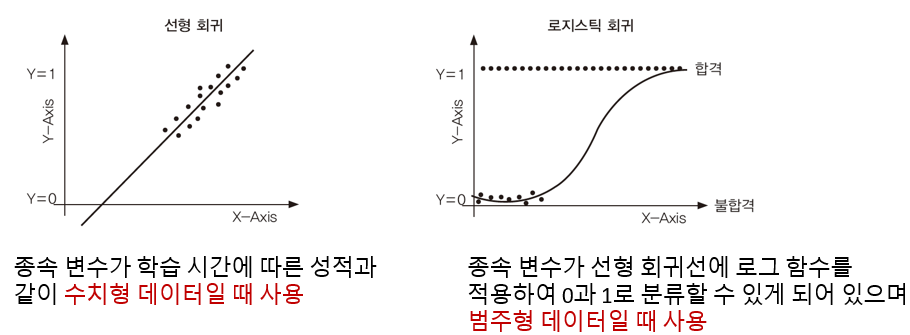

# 5. 모델 학습하기

In [18]:
# 모델 학습하기
LR_model.fit(X_train.values, Y_train.values)

LogisticRegression()

# 6. 모델 평가 및 예측하기

In [19]:
# 모델 평가하기
predict_results = LR_model.predict(X_test.values)
predict_results

array([0, 1, 1, ..., 0, 0, 1], dtype=uint8)

In [20]:
# 테스트 데이터로 결과 예측하기
accuracy_score(Y_test, predict_results) # 모델의 정확도 산출하기

0.9673550966022652

In [21]:
# 4개 속성으로 학습하면 결과가 어떻게 달라질까?
x2 = df_onehot[['nose_wide','nose_long', 'lips_thin', 'distance_nose_to_lip_long']] # 독립 변수
y2 = df_onehot['gender_Male'] # 종속 변수

In [22]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size = 0.3)

In [23]:
LR_model.fit(X2_train.values, Y2_train.values)

LogisticRegression()

In [24]:
# 모델 평가하기
predict_results2 = LR_model.predict(X2_test.values)
predict_results2

array([0, 1, 0, ..., 1, 0, 0], dtype=uint8)

In [25]:
# 테스트 데이터로 결과 예측하기
accuracy_score(Y2_test, predict_results2) # 모델의 정확도 산출하기

0.9586942038640907

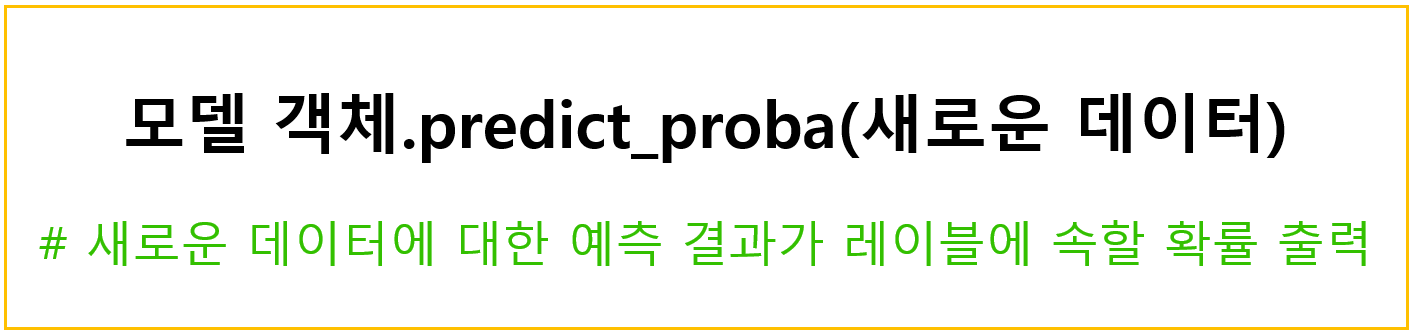

In [26]:
# 새로운 데이터로 예측하기
choi = np.array([[1, 0, 0, 0]])

In [27]:
# 새로운 데이터가 각 범주에 해당될 확률이 얼마나 되는지 출력하기
LR_model.predict_proba(choi)

array([[0.9646442, 0.0353558]])

In [29]:
print(LR_model.classes_)

[0 1]


choi를 여성으로 분류했다